# Project: TMBD-Movies Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


### The dataset we choose to analyze is tmbd-movies. We will investigate this dataset to answer the following questions:
1. What properties are relevant to the high revenue of the movie? And how?
2. How does the runtime change from year to year?

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#check the size of the dataset
df.shape

(10866, 21)

In [4]:
#check the datatypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
#get more information about this dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
#check the duplicates, will drop the duplicates if any later
df.duplicated().sum()

1

In [7]:
#check the number of unique values, which helps us know how to better analyze data.
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [8]:
#the value of column 'keywords' is hidden using head() function, let's see how it looks like.
df.keywords

0        monster|dna|tyrannosaurus rex|velociraptor|island
1         future|chase|post-apocalyptic|dystopia|australia
2        based on novel|revolution|dystopia|sequel|dyst...
3                    android|spaceship|jedi|space opera|3d
4                      car race|speed|revenge|suspense|car
5        father-son relationship|rape|based on novel|mo...
6        saving the world|artificial intelligence|cybor...
7              based on novel|mars|nasa|isolation|botanist
8        assistant|aftercreditsstinger|duringcreditssti...
9             dream|cartoon|imaginary friend|animation|kid
10       spy|based on novel|secret agent|sequel|james bond
11       jupiter|space|woman director|3d|interspecies r...
12       dancing|artificial intelligence|helicopter|dis...
13                  video game|nerd|alien attack|3d|pixels
14              marvel comic|comic|sequel|superhero|vision
15       bounty hunter|wyoming|mountains|hangman|voice ...
16               revenge|murder|on the run|fugitive|fram

### Data Cleaning
1. Drop duplicates
2. Drop columns that are not relevant to our analysis or have too many unique numbers to make further investigation
3. Fix the null data issue

In [9]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [10]:
#Drop columns that are not relevant to our analysis or have too many unique numbers to make further investigation
df.drop(['imdb_id','original_title','tagline','keywords','overview','homepage','production_companies','cast','director'],axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
id              10865 non-null int64
popularity      10865 non-null float64
budget          10865 non-null int64
revenue         10865 non-null int64
runtime         10865 non-null int64
genres          10842 non-null object
release_date    10865 non-null object
vote_count      10865 non-null int64
vote_average    10865 non-null float64
release_year    10865 non-null int64
budget_adj      10865 non-null float64
revenue_adj     10865 non-null float64
dtypes: float64(4), int64(6), object(2)
memory usage: 1.1+ MB


In [12]:
#Form the info above, we know there are null values in 'genres'. Let's check the sum of all nulls in every column.
df.isnull().sum()

id               0
popularity       0
budget           0
revenue          0
runtime          0
genres          23
release_date     0
vote_count       0
vote_average     0
release_year     0
budget_adj       0
revenue_adj      0
dtype: int64

In [13]:
#drop the null values
df.dropna(axis=0,inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

### What properties are relevant to the high revenue of the movie? And How?

Let's first see how these variables (revenue, budget, vote_average and release_year) distribution look like seperately.

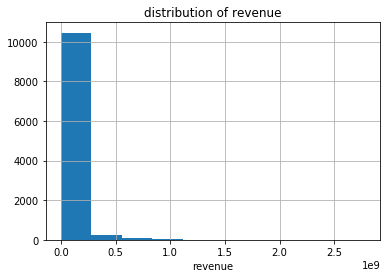

In [23]:
df.revenue.hist(bins=10)
plt.xlabel('revenue')
plt.title('distribution of revenue');

The distribution of revenue is skewed to the right.

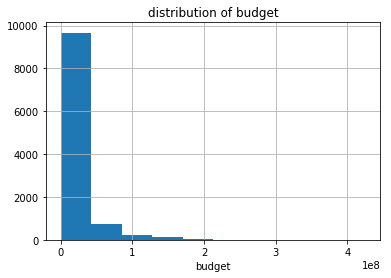

In [24]:
df.budget.hist()
plt.xlabel('budget')
plt.title('distribution of budget');

The distribution of budget is skewed to the right.

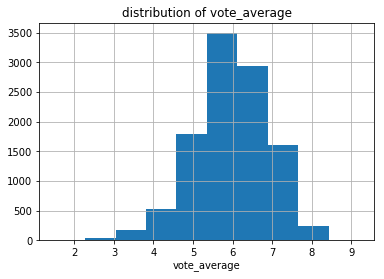

In [27]:
df.vote_average.hist()
plt.xlabel('vote_average')
plt.title('distribution of vote_average');

The distribution of vote_average is normal distribution.

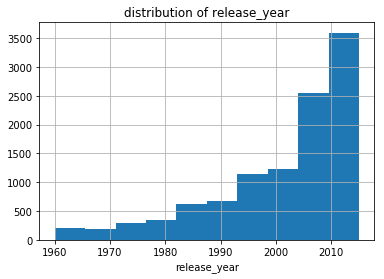

In [28]:
df.release_year.hist()
plt.xlabel('release_year')
plt.title('distribution of release_year');

The distribution of release_year is skewed to the left. The production of movies goes up with the year.

Let's investigate the relation between revenue and budget.

In [29]:
df.describe()['revenue']

count    1.084200e+04
mean     3.991138e+07
std      1.171179e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.414118e+07
max      2.781506e+09
Name: revenue, dtype: float64

In [32]:
df.describe()['budget']

count    1.084200e+04
mean     1.465531e+07
std      3.093971e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+07
max      4.250000e+08
Name: budget, dtype: float64

In [33]:
df.budget[df['revenue']>0].mean()

29569611.89193648

In [34]:
df.budget[df['revenue']==0].mean()

2587988.4907391956

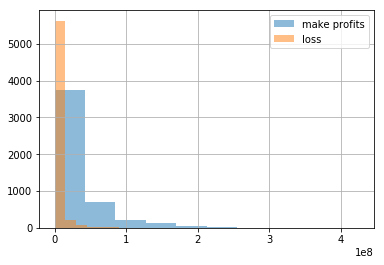

In [35]:
df.budget[df['revenue']>0].hist(alpha=0.5,label='make profits')
df.budget[df['revenue']==0].hist(alpha=0.5,label='loss')
plt.legend();

### Finding 1st: According to the distribution above, having a higher budget would increase the possibility of making more revenue.

Below, let's investigate the relation between vote_average and revenue.

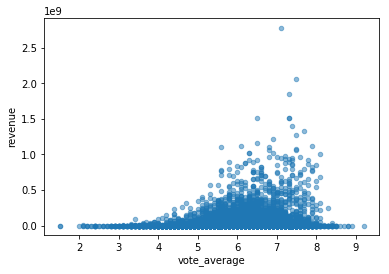

In [47]:
df.plot(x='vote_average',y='revenue',kind='scatter',alpha=0.5);

### The scatter plot above seems to show higher vote_average leads to better revenue, but not obviously. Below we will cut the vote_average into four groups to further investigate how it impacts the revenue.

In [37]:
df.describe()['vote_average']

count    10842.000000
mean         5.974064
std          0.934257
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

In [38]:
bin_edges=[1.5,5.4,6.0,6.6,9.2]
bin_names=['low','medium','mod_high','high']
df['vote_level']=pd.cut(df['vote_average'],bin_edges,labels=bin_names)
df.head()

,id,popularity,budget,revenue,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_level
0,135397,32.985763,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,mod_high
1,76341,28.419936,150000000,378436354,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,high
2,262500,13.112507,110000000,295238201,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,mod_high
3,140607,11.173104,200000000,2068178225,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,high
4,168259,9.335014,190000000,1506249360,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,high


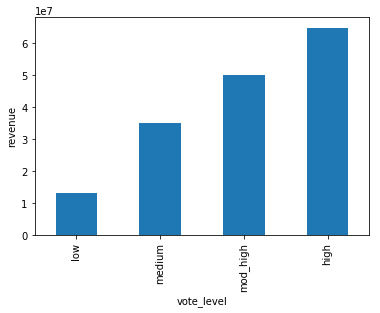

In [39]:
df.groupby('vote_level').mean().revenue.plot(kind='bar')
plt.ylabel('revenue');

### Findings 2nd: According to the figure above, higher vote_level would have better revenue.

Below, let's investigate the relation between the release year and revenue.

In [40]:
df.describe().release_year

count    10842.000000
mean      2001.314794
std         12.813617
min       1960.000000
25%       1995.000000
50%       2006.000000
75%       2011.000000
max       2015.000000
Name: release_year, dtype: float64

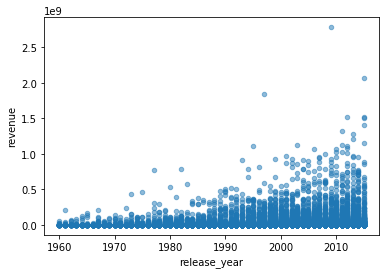

In [46]:
df.plot(x='release_year',y='revenue',kind='scatter',alpha=0.5);

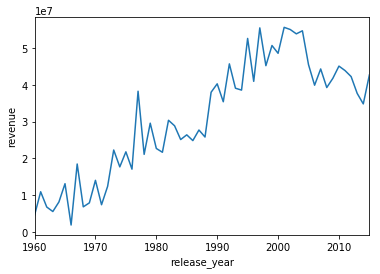

In [42]:
df.groupby('release_year').mean().revenue.plot(kind='line')
plt.ylabel('revenue');

### Findings 3rd: according to the plots above, the revenue goes up with the release year in general. After 2000 year, the revenue slitely goes down with the year.

### How does the runtime change from year to year?

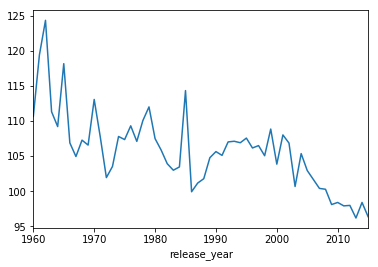

In [45]:
df.groupby('release_year').runtime.mean().plot(kind='line');

### Answer: In gerenal, the average runtime goes down from year to year. In the recent decade, it is controlled within 100 mins.

<a id='conclusions'></a>
## Conclusions

Q1: What properties are relevant to the high revenue of the movie? And how?
We investigate the relation between three properties budget, vote_average and release year and revenue. Below is what we find:
1. Having a higher budget would increase the possibility of making more revenu.
2. Higher vote_level would have better chance to get higher revenue.
3. The revenue goes up with the release year in general. After 2000 year, the revenue slitely goes down with the year.

Q2: How does the runtime change from year to year?

In gerenal, the average runtime goes down from year to year. In the recent decade, it is controlled within 100 mins.

Note: The conclusions above are observed from plots not derived from statistical analysis. There would be the need of further analysis to support your findings.